<a href="https://colab.research.google.com/github/turjo997/Pattern-Recognition/blob/main/Minimum_Distance_to_class_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir = "/content/drive/MyDrive/PatternRecognition/Assignment1/train.txt"

In [ ]:
df1 = pd.read_csv(dir, sep=" " , header = None,dtype = 'Float64')
df1.columns = ['X1','X2','Class_label']
print(df1)

     X1   X2  Class_label
0   2.0  2.0          1.0
1   3.0  1.0          1.0
2  -4.0  3.0          2.0
3   3.0  3.0          1.0
4  -1.0 -3.0          1.0
5   2.0  6.0          2.0
6   4.0  2.0          1.0
7  -2.0 -2.0          1.0
8   0.0  0.0          2.0
9  -2.0  2.0          2.0
10 -1.0 -1.0          2.0
11 -4.0  2.0          2.0


In [ ]:
Feature1 = np.array(df1['X1'].copy())
Feature2 = np.array(df1['X2'].copy())
level = np.array(df1['Class_label'].copy())

In [ ]:
x = np.mean(Feature1)
y = np.mean(Feature2)
print(x)
print(y)

0.0
1.25


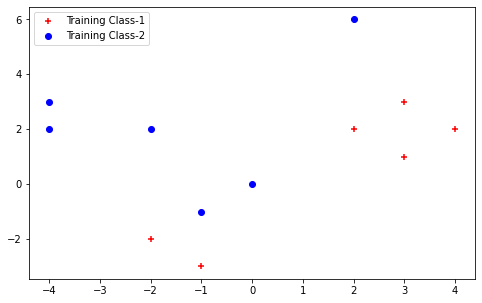

In [ ]:
class1X1 = []
class1X2 = []

class2X1 = []
class2X2 = []

for i in range(len(level)):

  if (level[i] == 1.0):
    class1X1.append(Feature1[i])
    class1X2.append(Feature2[i])
  else:
    class2X1.append(Feature1[i])
    class2X2.append(Feature2[i])

plt.figure(figsize=(8,5))
plt.scatter(class1X1, class1X2, c='red', label = 'Training Class-1', marker = '+')
plt.scatter(class2X1, class2X2, c='blue', label = 'Training Class-2', marker = 'o')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
dir1 = "/content/drive/MyDrive/PatternRecognition/Assignment1/test.txt"
#df2 = pd.read_csv(dir1, sep=" " , header = None,dtype = 'Float64')
df2 = pd.read_csv(dir1 , sep=' ',header=None,dtype='Int64');  
testval = df2.values
df2.columns = ['X1','X2','Class_label']
print(testval)

[[-1 -5 1]
 [3 2 1]
 [-2 1 2]
 [8 2 1]
 [6 -1 1]
 [0 2 1]
 [-3 0 2]]


In [ ]:
feature1 = np.array(df2['X1'].copy())
feature2 = np.array(df2['X2'].copy())
level1 = np.array(df2['Class_label'].copy())
print(level1)

[1 1 2 1 1 1 2]


In [ ]:
import math 
for i in range(len(feature1)):
  z = math.sqrt((feature1[i] - x) ** 2 + (feature2[i] - x) ** 2)
  print(z)

5.0990195135927845
3.605551275463989
2.23606797749979
8.246211251235321
6.082762530298219
2.0
3.0


In [ ]:
for i in range(len(feature1)):
  z = math.sqrt((feature1[i] - y) ** 2 + (feature2[i] - y) ** 2)
  print(z)

6.642665127793212
1.9039432764659772
3.2596012026013246
6.791538853603062
5.25594901040716
1.4577379737113252
4.430011286667337


In [ ]:
print(class1X1)

[2.0, 3.0, 3.0, -1.0, 4.0, -2.0]


In [ ]:
class1meanx1 = np.mean(class1X1)
class1meanx2 = np.mean(class1X2)

class2meanx1 = np.mean(class2X1)
class2meanx2 = np.mean(class2X2)

In [ ]:
print(class1meanx1 , class1meanx2 , class2meanx1 , class2meanx2)

1.5 0.5 -1.5 2.0


In [ ]:
mean1=[class1meanx1 , class1meanx2]
print(mean1)
mean2=[class2meanx1 , class2meanx2]
print(mean2)

[1.5, 0.5]
[-1.5, 2.0]


In [ ]:
dir1 = "/content/drive/MyDrive/PatternRecognition/Assignment1/test.txt"
#df2 = pd.read_csv(dir1, sep=" " , header = None,dtype = 'Float64')
df2 = pd.read_csv(dir1 , sep=' ', header=None,dtype = 'Float64');  
df2.columns = ['X1','X2','Class_label']
testval = df2.values

print(testval)

[[-1.0 -5.0 1.0]
 [3.0 2.0 1.0]
 [-2.0 1.0 2.0]
 [8.0 2.0 1.0]
 [6.0 -1.0 1.0]
 [0.0 2.0 1.0]
 [-3.0 0.0 2.0]]


In [ ]:
TestClass1X1 = []
TestClass1X2 = []

TestClass2X1 = []
TestClass2X2 = []

Testlevel = []

for m ,n , p in testval:
 
  arr = np.array([m,n])
  g1 = np.dot(arr.T , mean1) - 0.5 * np.dot(mean1, mean1)
  g2 = np.dot(arr.T , mean2) - 0.5 * np.dot(mean2, mean2)

  if(g1 > g2):
    TestClass1X1.append(arr[0])
    TestClass1X2.append(arr[1])
    Testlevel.extend([1])
  else:
    TestClass2X1.append(arr[0])
    TestClass2X2.append(arr[0])
    Testlevel.extend([2])



In [ ]:
print(TestClass1X1)
print(TestClass1X2)
print(TestClass2X1)
print(TestClass2X2)
print(Testlevel)
print(level1)

[-1.0, 3.0, 8.0, 6.0]
[-5.0, 2.0, 2.0, -1.0]
[-2.0, 0.0, -3.0]
[-2.0, 0.0, -3.0]
[1, 1, 2, 1, 1, 2, 2]
[1 1 2 1 1 1 2]


In [ ]:
np_array = df2.to_numpy();
print(np_array)

[[-1 -5 1]
 [3 2 1]
 [-2 1 2]
 [8 2 1]
 [6 -1 1]
 [0 2 1]
 [-3 0 2]]


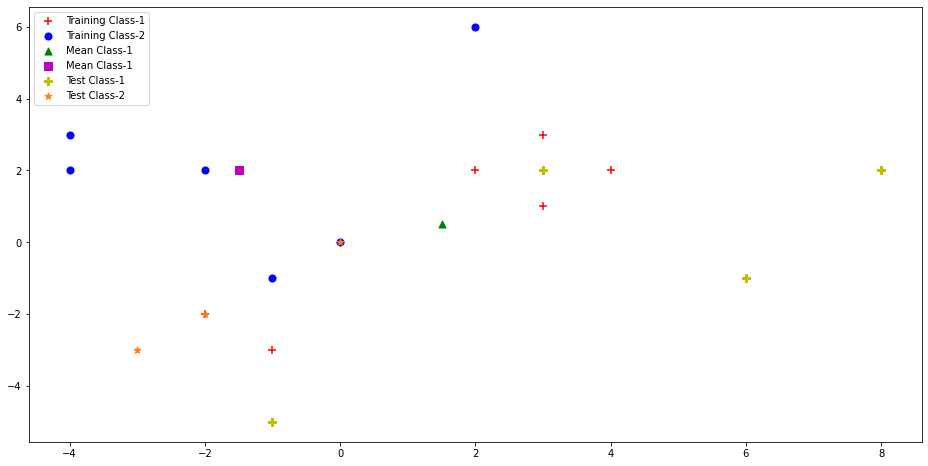

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(class1X1, class1X2, c='red', label = 'Training Class-1', marker = '+' , s=50)
plt.scatter(class2X1, class2X2, c='blue', label = 'Training Class-2', marker = 'o' , s=50)

plt.scatter(class1meanx1, class1meanx2, c='g', label = 'Mean Class-1', marker = '^' , s=50)
plt.scatter(class2meanx1, class2meanx2, c='m', label = 'Mean Class-1', marker = "s" , s=50)

plt.scatter(TestClass1X1, TestClass1X2, c='y', label = 'Test Class-1', marker = "P" , s=50)
plt.scatter(TestClass2X1, TestClass2X2, c='#ff7f0e', label = 'Test Class-2', marker = "*" , s=50)

plt.legend(loc = 'upper left')
plt.show()

In [ ]:
correct = 0

for i in range(len(Testlevel)):
  if Testlevel[i] == level1[i]:
    correct = correct + 1
  
Accuracy = (correct / len(Testlevel)) * 100
print(Accuracy)

85.71428571428571


In [ ]:
dir = "/content/drive/MyDrive/PatternRecognition/Assignment1/train.txt"
df = pd.read_csv(dir, sep=' ', header=None,dtype = 'Float64');  
trainval = df.values

print(trainval)

[[2.0 2.0 1.0]
 [3.0 1.0 1.0]
 [-4.0 3.0 2.0]
 [3.0 3.0 1.0]
 [-1.0 -3.0 1.0]
 [2.0 6.0 2.0]
 [4.0 2.0 1.0]
 [-2.0 -2.0 1.0]
 [0.0 0.0 2.0]
 [-2.0 2.0 2.0]
 [-1.0 -1.0 2.0]
 [-4.0 2.0 2.0]]


In [ ]:
a = np.subtract(mean1 , mean2)
mul1 = np.dot(mean1 , mean2)
mul2 = np.dot(mean2 , mean2)
#print(0.5 * np.add( mul1 , mul2))
#print(0.5 *  (mul1 + mul2))
db_list_x=[]
db_list_y=[]

for x in [x * 0.1 for x in range(-40, 80)]:
  Y = np.dot(a , x) - 0.5 * np.subtract(mul1 , mul2)
  db_list_x.append(x)
  db_list_y.append(Y[0])  

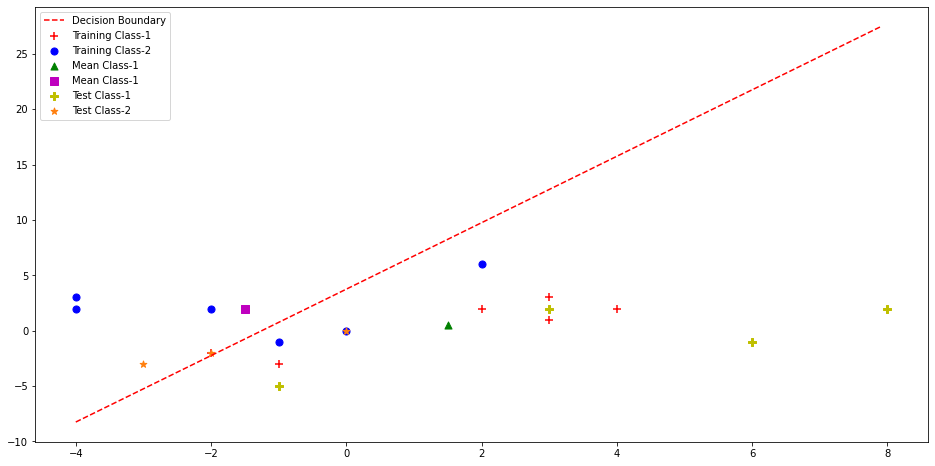

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(class1X1, class1X2, c='red', label = 'Training Class-1', marker = '+' , s=50)
plt.scatter(class2X1, class2X2, c='blue', label = 'Training Class-2', marker = 'o' , s=50)

plt.scatter(class1meanx1, class1meanx2, c='g', label = 'Mean Class-1', marker = '^' , s=50)
plt.scatter(class2meanx1, class2meanx2, c='m', label = 'Mean Class-1', marker = "s" , s=50)

plt.scatter(TestClass1X1, TestClass1X2, c='y', label = 'Test Class-1', marker = "P" , s=50)
plt.scatter(TestClass2X1, TestClass2X2, c='#ff7f0e', label = 'Test Class-2', marker = "*" , s=50)

plt.plot(db_list_x,db_list_y,'r--',label='Decision Boundary')

plt.legend(loc = 'upper left')
plt.show()

In [ ]:
print(a)

[ 3.  -1.5]


In [ ]:
print(mean1)
print(mean2)

[1.5, 0.5]
[-1.5, 2.0]
